<a href="https://colab.research.google.com/github/Ankit-045/Ankit-045/blob/main/Netflix_Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1 Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

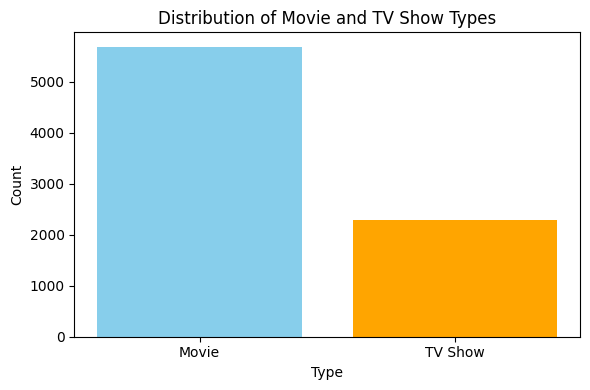

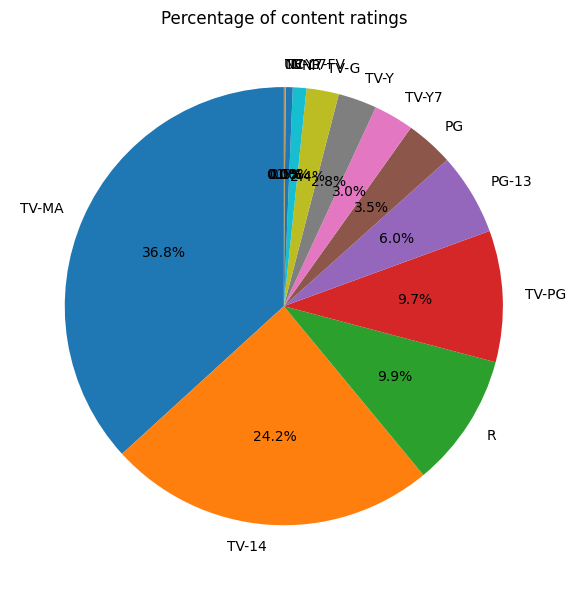

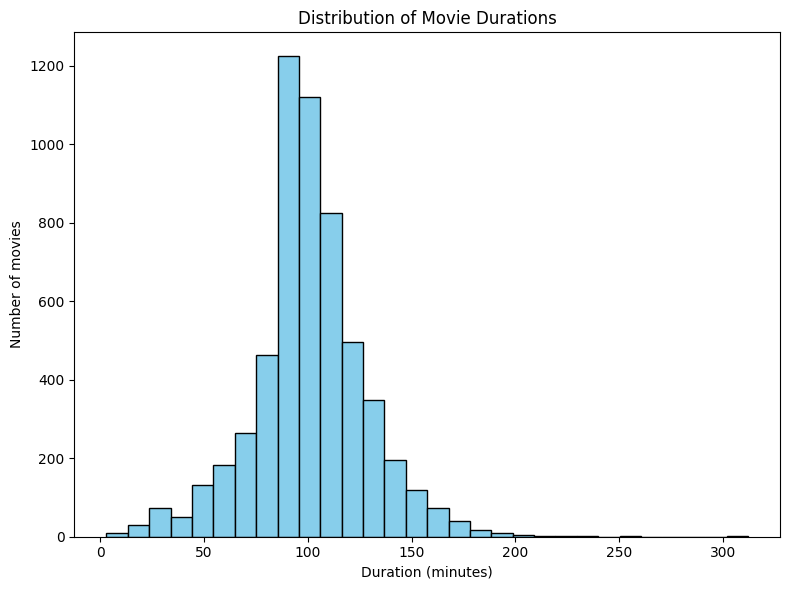

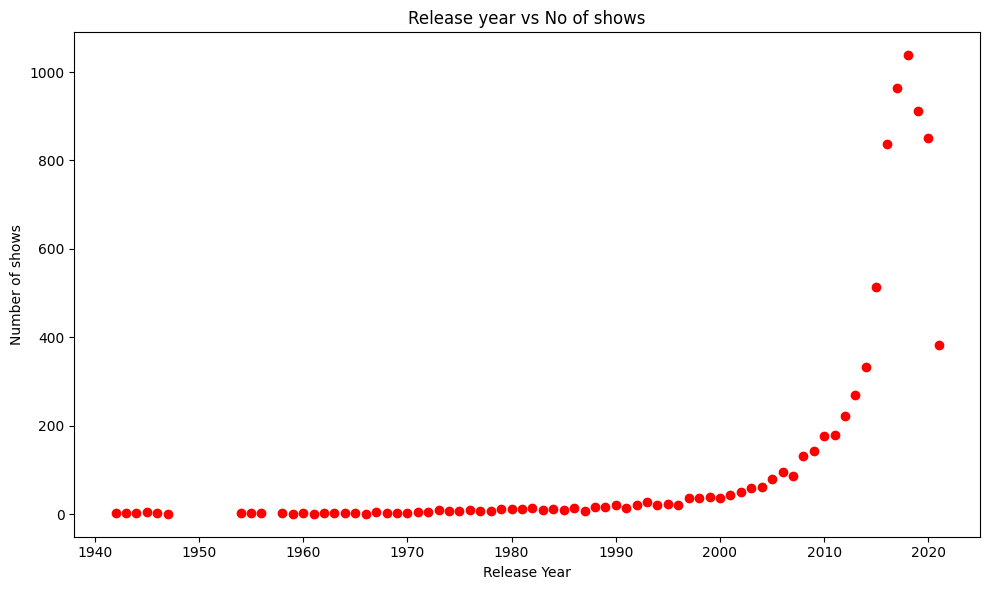

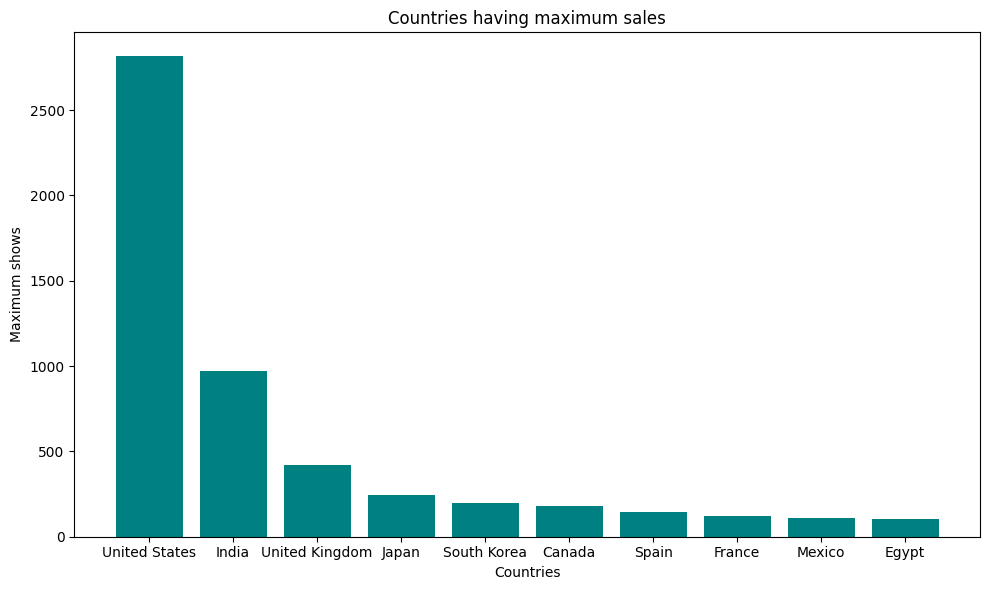

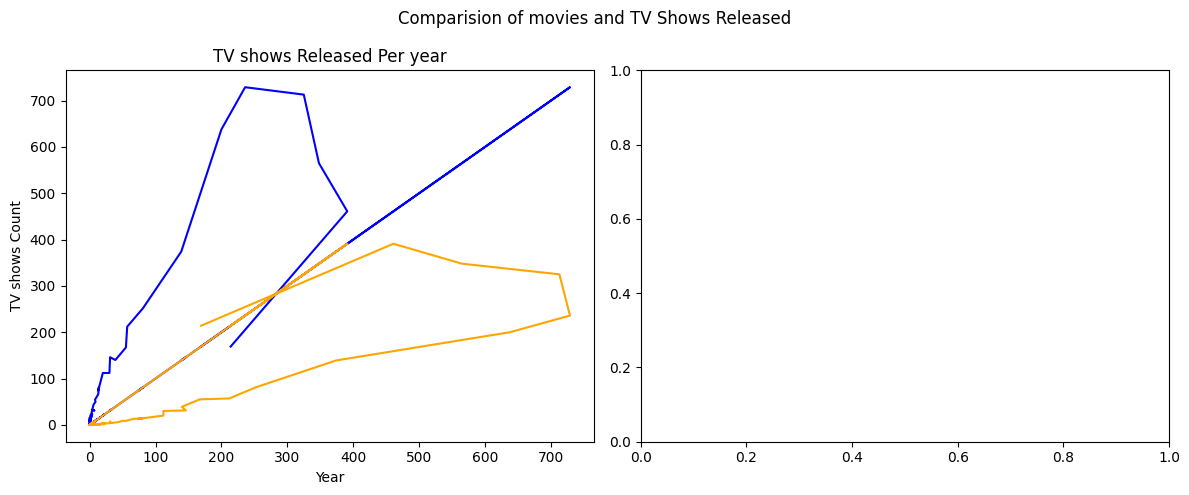

In [18]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')
# Clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])
# Showing tv shows vs Web series
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movie and TV Show Types')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

# Movie rating distribution in Pie chart
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of content ratings')
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()


# Movie duration using histograme
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace('min', '').astype(int)
plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig('movie_duration.png')
plt.show()

# Scatter Plot - Release year vs Number of shows

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release year vs No of shows')
plt.xlabel('Release Year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig('releaseYear_vs_noofshows.png')
plt.show()


# Top 10 countries having maximum number of shows
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='teal')
plt.title('Countries having maximum sales')
plt.xlabel('Countries')
plt.ylabel('Maximum shows')
plt.tight_layout()
plt.savefig('countriesVsShows.png')
plt.show()

# Movies vs Tvshows  - Subplots by year

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))
#first subplot : Movies
ax[0].plot(content_by_year, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Movies Count')

#second Subplot:TV shows
ax[0].plot(content_by_year, content_by_year['TV Show'], color='orange')
ax[0].set_title('TV shows Released Per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('TV shows Count')
fig.suptitle('Comparision of movies and TV Shows Released')
plt.tight_layout()
plt.savefig('Subplot_TV_shows.png')
plt.show()